In [1]:
import sys
import stmpy
import numpy as np
from numpy import pi
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import scipy.fftpack as fftp
import os
from scipy import signal
import scipy
import time
from matplotlib import colors
%pylab inline

C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


(0, 60)

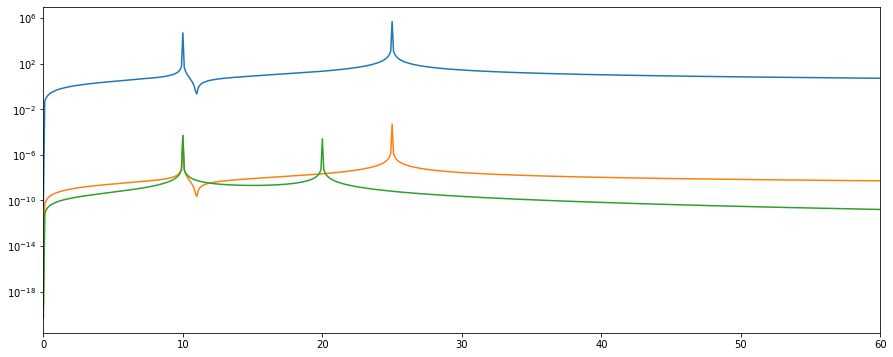

In [2]:
figsize(15,6)
t= linspace(0,10,100000)
amp = 1
amp_convert = 1e-9
noise = 1e-3*np.random.random(len(t))
x = amp*np.sin(10*2*pi*t) + 10*np.sin(25*2*pi*t) 
y = amp_convert*(np.copy(x))
y2 = amp_convert*amp*(np.sin(10*2*pi*t) + 0.5*np.sin(20*2*pi*t+1*pi))# + 0.33333*np.sin(30*2*pi*t+0.5*pi))
y2_dash = y2 + amp_convert*amp*(10*np.sin(25*2*pi*t))
freqs = np.fft.fftfreq(len(x),1/10000)
x_fft = np.fft.fft(x)
y_fft = np.fft.fft(y)
y2_fft = np.fft.fft(y2)
y2_dash_fft = np.fft.fft(y2_dash)
ph = np.angle(x_fft)

Geo = scipy.interpolate.interp1d(freqs,x_fft, kind='linear')
Tip_clear = scipy.interpolate.interp1d(freqs,y_fft, kind='linear')
Tip_harmonics = scipy.interpolate.interp1d(freqs,y2_fft, kind='linear')
Tip_lin = scipy.interpolate.interp1d(freqs,y2_dash_fft,kind='linear')
phase = np.angle(Geo(freqs))
semilogy(freqs[:int(len(x)/2)],absolute(Geo(freqs)[:int(len(x)/2)]))
semilogy(freqs[:int(len(x)/2)],absolute(Tip_clear(freqs)[:int(len(x)/2)]))
semilogy(freqs[:int(len(x)/2)],absolute(Tip_harmonics(freqs)[:int(len(x)/2)]))
xlim(0,60)

(0, 50)

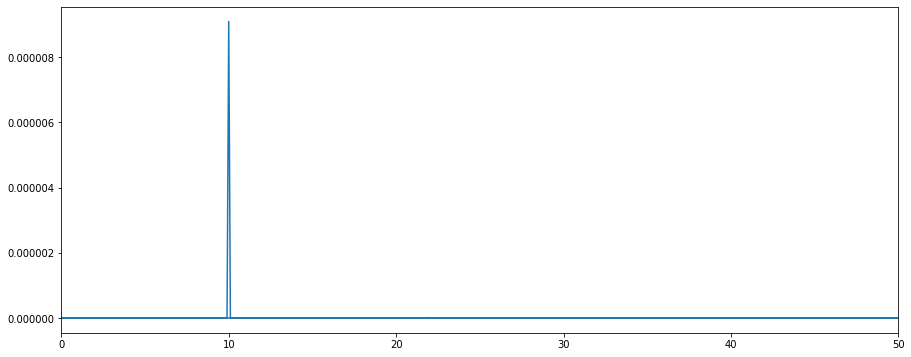

In [99]:
def coef(w,harmonic):
    return Tip_clear(w)/Geo(w)
def coef2(w,harmonic):
    return (1/harmonic)*Tip_harmonics(w)/Geo(w/harmonic)

C_1 = scipy.interpolate.interp1d(freqs,coef(freqs,1),kind='linear')
C_2 = scipy.interpolate.interp1d(freqs,coef2(freqs,2),kind='linear')
C_3 = scipy.interpolate.interp1d(freqs,coef2(freqs,3),kind='linear')
C_4 = scipy.interpolate.interp1d(freqs,coef2(freqs,4),kind='linear')
C_5 = scipy.interpolate.interp1d(freqs,coef2(freqs,5),kind='linear')


plot(freqs,absolute(C_2(freqs)))
xlim(0,50)
# ylim(-10,10000)

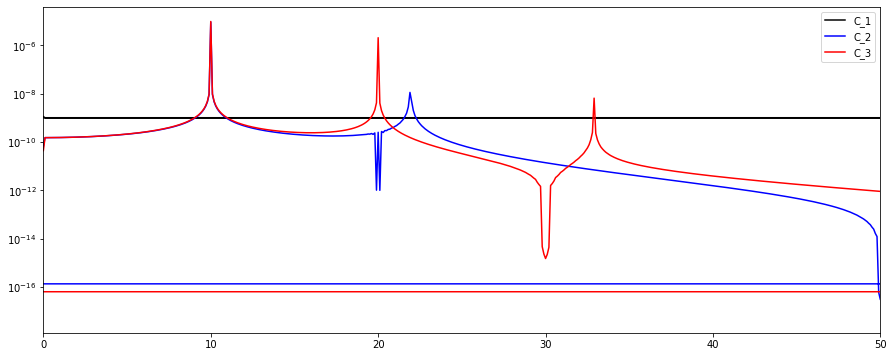

In [103]:
t = linspace(0,10,100000)
amp = 1
amp_convert = 1e-9
noise = 1e-3*np.random.random(len(t))
test = amp*np.sin(10*2*pi*t) + 10*np.sin(25*2*pi*t) 
test_tip = amp_convert*amp*(np.sin(10*2*pi*t) + 0.5*np.sin(20*2*pi*t+1*pi) )+ amp_convert*10*np.sin(25*2*pi*t)
test_fft = np.fft.fft(test)
test_tip_fft = np.fft.fft(test_tip)
freqs = np.fft.fftfreq(len(test_tip_fft),1/10000)
test_interp = scipy.interpolate.interp1d(freqs,test_fft,kind='linear')
mat_tip = C_1(freqs)*test_interp(freqs) + C_2(freqs)*test_interp(freqs/2) #+ C_3(freqs)*test_interp(freqs/3)
matr_wave = np.fft.ifft(mat_tip)

linear_transf = Tip_lin(freqs)/Geo(freqs)
lin_tip = linear_transf*test_fft
linear_wave = np.fft.ifft(linear_transf*test_fft)


freq_miss_2d = np.fft.fft(test_tip-matr_wave)
freq_miss_lin = np.fft.fft(test_tip-linear_wave)

# plot(t,test)
# plot(t,test_tip,label='Tip')
# # plot(t,matr_wave,label='Matrix Approximation')
# # plot(t,linear_wave,label='Linear Approximation')
# plot(t,test_tip-matr_wave,label='Matrix')
# plot(t,test_tip-linear_wave,label='Linear')
# xlim(0.05,0.75)
# semilogy(freqs,absolute(test_fft))

one = C_1(freqs)
two = C_2(freqs)
three = C_3(freqs)

# semilogy(freqs[:int(len(t))],absolute(test_tip_fft[:int(len(t))]),'r',label='Tip')
# semilogy(freqs[:int(len(t))],absolute(lin_tip[:int(len(t))]),'b',label='Matrix Approximation')
semilogy(freqs[:int(len(t))],absolute(one[:int(len(t))]),'k',label='C_1')
semilogy(freqs[:int(len(t))],absolute(two[:int(len(t))]),'b',label='C_2')
semilogy(freqs[:int(len(t))],absolute(three[:int(len(t))]),'r',label='C_3')
# semilogy(freqs[:int(len(t))],absolute(mat_tip[:int(len(t))]),label='Linear Approximation')
# semilogy(freqs[:int(len(t))],absolute(freq_miss_2d[:int(len(t))]),'k',label='Missed Matrix Frequencies')
# semilogy(freqs[:int(len(t))],absolute(freq_miss_lin[:int(len(t))]),label='Missed Linear Frequencies')
xlim(0,50)
# plot(freqs,absolute(C_5(freqs)))
# xlim(-50,50)
# ylim(-5e-7,5e-6)
legend()


In [89]:
rms_matrix = np.sqrt(np.mean(np.square(test_tip-matr_wave)))
rms_lin = np.sqrt(np.mean(np.square(test_tip-linear_wave)))
rms_tip = np.sqrt(np.mean(np.square(test_tip)))

print(1-abs(rms_matrix/rms_tip))
print(1-abs(rms_lin/rms_tip))

0.9444444444444444
0.9999999999999997
